In [1]:
%%capture --no-stderr
%pip install -U langgraph langsmith langchain_anthropic groq

In [16]:
!pip install langchain-groq

In [17]:
import getpass
import os
# from google.colab import userdata
# groq_api_key = userdata.get('GROQ_API_KEY')

#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

In [18]:
groq_api_key = os.getenv("GROQ_API_KEY")

In [19]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [20]:
# !pip install langchain-groq

In [22]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="deepseek-r1-distill-llama-70b",temperature=0.3, api_key=groq_api_key)

def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)

In [23]:
graph_builder.add_edge(START, "chatbot")

In [24]:
graph_builder.add_edge("chatbot", END)

In [25]:
graph = graph_builder.compile()

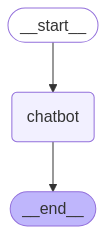

In [26]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [27]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)

Assistant: <think>

</think>

LangChain is a framework designed to build applications powered by large language models (LLMs). It provides a set of tools and abstractions to create more sophisticated and interactive AI systems. LangChain allows developers to combine multiple LLMs, chain their outputs, and integrate external data sources or APIs, enabling more complex reasoning and problem-solving capabilities.

Key features of LangChain include:

1. **LLM Composition**: The ability to combine multiple language models to create more powerful systems.
2. **Memory and State Management**: Maintaining context and state across interactions, which is crucial for multi-step tasks.
3. **Integration with External Data**: Incorporating real-world data and APIs into the decision-making process.
4. **Chain of Thought**: Encouraging models to break down complex tasks into intermediate steps, mimicking human-like reasoning.

LangChain is particularly useful for applications that require sequential re